In [17]:
import numpy as np
import torch
import gymnasium as gym
from gymnasium import spaces

import imageio
import os
import random
import copy

#from Combined_Agent_Double.Dueling_DDQN_Agent import Dueling_DDQN_Agent
#from Combined_Agent_Double.utils.random_agent import RandomAgent
#from Combined_Agent_Double.utils.actions import MORE_ACTIONS
#import Combined_Agent_Double.utils.stats_functions as sf

from Agents.Prio_n_step.Prio_DQN_Agent import Prio_DQN_Agent
from Agents.Pablo.Adaptative_Dueling_Double_DQN.Agent import Adaptative_Dueling_Double_DQN
from Agents.Random.random_agent import RandomAgent
from Agents.utils.actions import MORE_ACTIONS
import Agents.utils.stats_functions as sf
import hockey.hockey_env as h_env

from Agents.Pablo.Agent import Dueling_DDQN_Agent
from Agents.Tapas_en_Mallorca.old.Agent import Combined_Agent
from Agents.Tapas_en_Mallorca.Adaptative_Dueling_Double_DQN.Agent import Adaptative_Dueling_Double_DQN_better_mem

from importlib import reload

In [18]:
SEED_TRAIN_1 = 7489
SEED_TRAIN_2 = 1312
SEEDS_TEST = [291 +  563 *i for i in range(10)]

seed = SEED_TRAIN_1

USE_MORE_ACTIONS = True

In [19]:
reload(h_env)
#env_name = "../weights/prio_agent_23_02_25_n_step_4_alpha_0.4"
#env_name = "../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_10_games_only"
env_name = "../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_bigger_nn"
env = h_env.HockeyEnv()
h_env.HockeyEnv().seed(seed)
#env = gym.make("CartPole-v1", render_mode = "rgb_array")

state_space = env.observation_space

if(USE_MORE_ACTIONS):
    action_space = spaces.Discrete(len(MORE_ACTIONS))
else: 
    action_space = env.discrete_action_space

agent = Adaptative_Dueling_Double_DQN_better_mem(state_space, action_space, seed = seed, eps = 0.01,use_dueling = True, use_double = True, use_noisy = True, use_prio = True ,learning_rate = 0.0001, hidden_sizes = [256, 256], n_steps = 4, env = env, use_more_actions = USE_MORE_ACTIONS)
#agent = Adaptative_Dueling_Double_DQN(state_space, action_space, seed = seed,use_dueling = True, use_double = True, use_noisy = True ,eps = 0.01, learning_rate = 0.0001, hidden_sizes = [256, 256], env = env, use_more_actions = USE_MORE_ACTIONS)
#agent = Prio_DQN_Agent(state_space, action_space, seed = seed, eps = 0.01, learning_rate = 0.0001, hidden_sizes = [256, 256], n_steps = 4, env = env, use_more_actions = USE_MORE_ACTIONS)
agent.Q.load(env_name, name= "most_recent")

/home/goon/studium/hockey-en-mallorca/.venv/lib/python3.10/site-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/goon/studium/hockey-en-mallorca/.venv/lib/python3.10/site-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


Dueling Network Architecture with Noisy Layers
  Input Layer: (18)
  Hidden Layer 1: Linear(18, 256) -> Tanh
  Hidden Layer 2: NoisyLinear(256, 256) -> Tanh
  Value Stream: Linear(256, 1)
  Advantage Stream: Linear(256, 20)
------------------------------------------------------
Dueling Network Architecture with Noisy Layers
  Input Layer: (18)
  Hidden Layer 1: Linear(18, 256) -> Tanh
  Hidden Layer 2: NoisyLinear(256, 256) -> Tanh
  Value Stream: Linear(256, 1)
  Advantage Stream: Linear(256, 20)
------------------------------------------------------
Network loaded from ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_bigger_nn/weights/most_recent.pth


/home/goon/studium/hockey-en-mallorca/src/hockey-env/Agents/Tapas_en_Mallorca/Adaptative_Dueling_Double_DQN/QFunction.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  se

In [20]:
stats, losses = sf.load_stats(env_name)

Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_bigger_nn/stats/plots/returns_plot.png


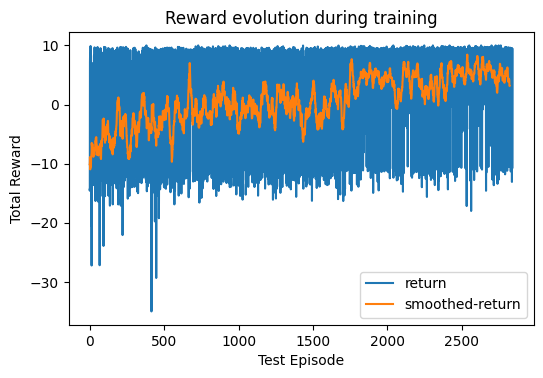

In [21]:
sf.plot_returns(stats, env_name)

Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_bigger_nn/stats/plots/losses_plot.png


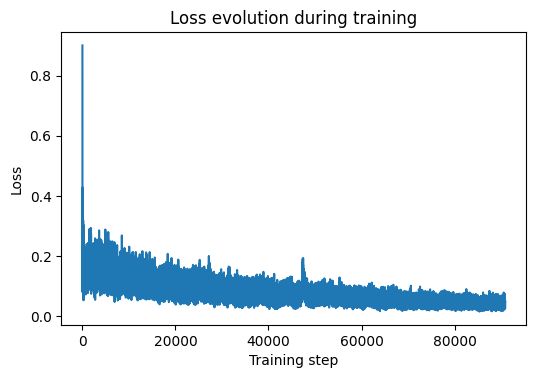

In [22]:
sf.plot_losses(losses, env_name)

Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_bigger_nn/stats/plots/beta_evolution.png


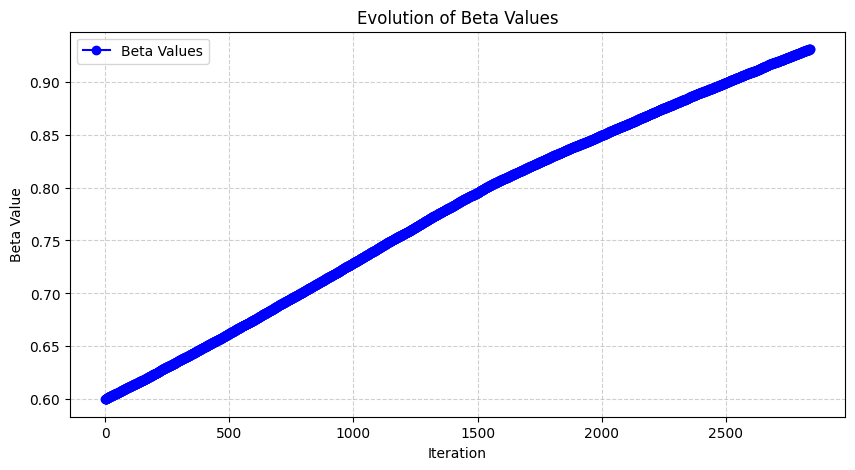

In [23]:
betas = sf.load_betas(env_name)
sf.plot_beta_evolution(env_name, betas)

Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_bigger_nn/stats/plots/epsilon_evolution.png


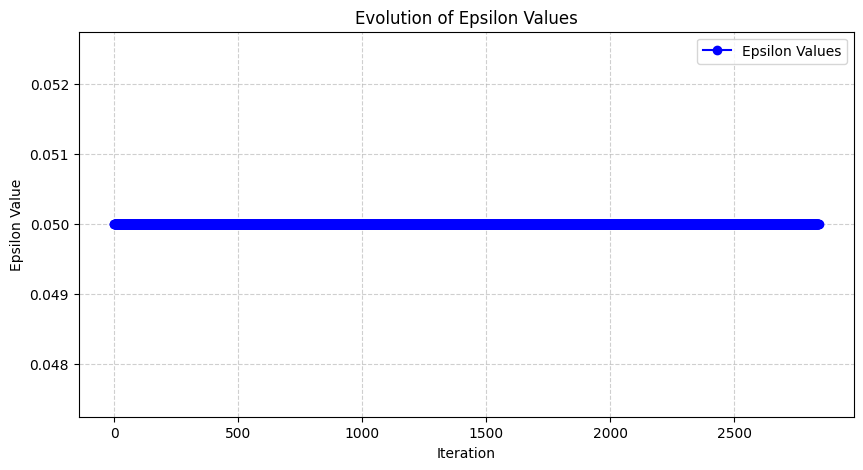

In [24]:
epsilons = sf.load_epsilons(env_name)
sf.plot_epsilon_evolution(env_name, epsilons)

Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_bigger_nn/stats/plots/match_evolution.png


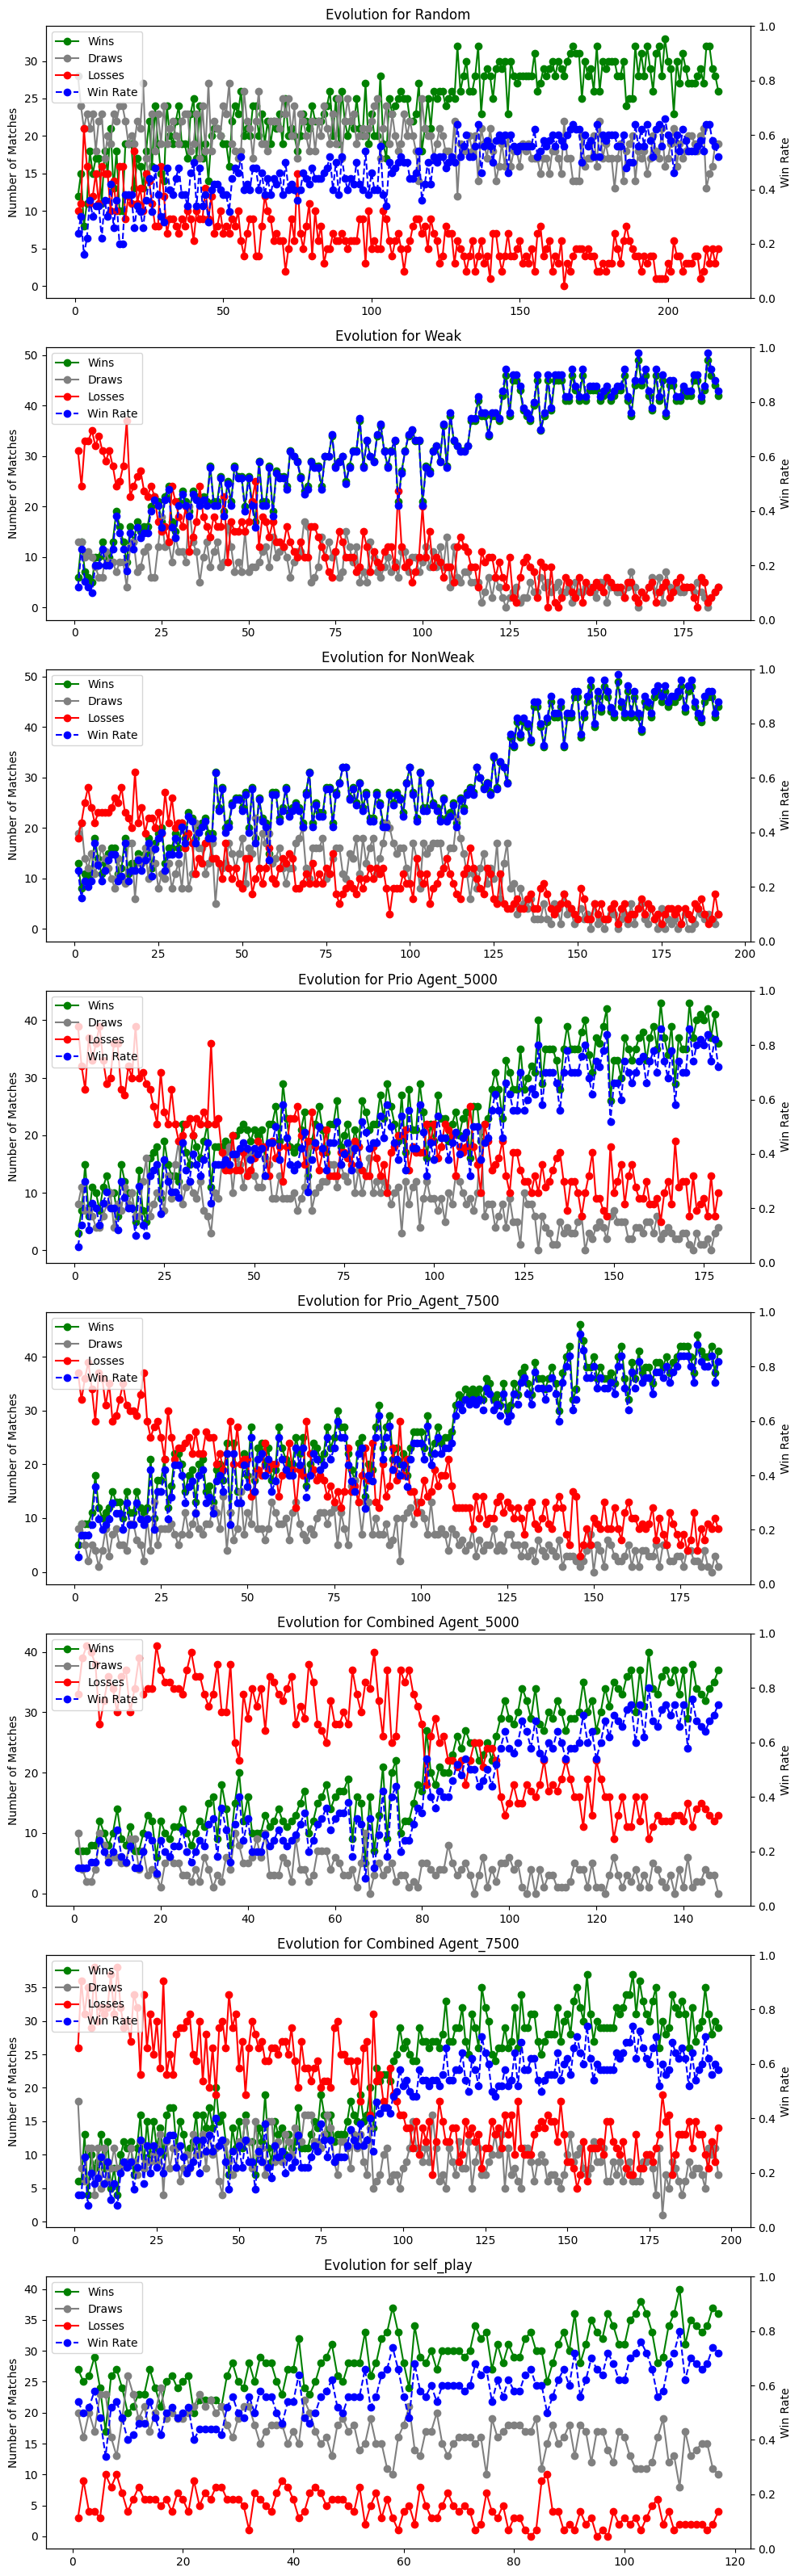

In [25]:
match_history = sf.load_match_history(env_name)
sf.plot_match_evolution_by_chunks(env_name, match_history,  [
    "Random",
    "Weak",
    "NonWeak",
    "Prio Agent_5000",
    "Prio_Agent_7500",
    "Combined Agent_5000",
    "Combined Agent_7500",
    "self_play",
], 50)

#sf.plot_match_evolution_by_chunks(env_name, match_history,  ["Weak", "NonWeak" ],50)


In [26]:
def test_agent(agent = agent, opponent = RandomAgent(seed), test_episodes  = len(SEEDS_TEST), max_steps = 30000, opponent_name = "random", agent_name = "prio_agent", env_name = env_name):
   
    test_rewards = []
    test_name = f"{opponent_name}_vs_{agent_name}"
  
    won_games = 0
    lost_games = 0
    tied_games = 0
    for episode in range(test_episodes):

        obs_agent1, _ = env.reset(seed = SEEDS_TEST[episode])
       #state = env.reset(seed = seed)
        env.action_space.seed(seed = SEEDS_TEST[episode])
        obs_agent1= obs_agent1[0] if isinstance(obs_agent1, tuple) else obs_agent1  # Handle Gymnasium compatibility

        obs_agent2 = env.obs_agent_two()
        obs_agent2 = obs_agent2[0] if isinstance(obs_agent2, tuple) else obs_agent2

        total_reward = 0

        frames = []
        
        for t in range(max_steps):

            done = False

            frame = env.render(mode = "rgb_array")
            if frame is not None:
                frames.append(frame)

            a1_cont = agent.get_step(obs_agent1)
            a2 = opponent.act(obs_agent2)

            full_action = np.hstack([a1_cont, a2])

            next_state, reward, done, truncated, _ = env.step(full_action)
            
            total_reward += reward

            obs_agent1 = next_state
            obs_agent2 = env.obs_agent_two()

            if done or truncated: break

        test_rewards.append(total_reward)
        won = env.winner == 1
        if won:
            won_games += 1
        tie = env.winner == 0
        if tie:
            tied_games += 1
        lost = not won and not tie
        if lost:
            lost_games += 1
        string = "Won" if won else "Tie" if tie else "Lost"
        print(f"Test Episode {episode+1}, Total Reward: {total_reward}", string)
       
        
        if frames:
            os.makedirs(f"{env_name}/test_gifs/{test_name}", exist_ok=True)
            imageio.mimsave(f"{env_name}/test_gifs/{test_name}/test_episode_{episode+1}.gif", frames, fps=30)

    env.close()
    winrate = won_games / test_episodes
    tie_rate = tied_games / test_episodes
    loss_rate = lost_games / test_episodes
    print(f"Winrate: {winrate}, Tie Rate: {tie_rate}, Loss Rate: {loss_rate}")
    results_name = f"test_results_{test_name}"
    sf.save_test_results(env_name, test_rewards, name = results_name)

Test Episode 1, Total Reward: -13.7105967733127 Lost
Test Episode 2, Total Reward: 9.666908955842704 Won
Test Episode 3, Total Reward: 0.0 Tie
Test Episode 4, Total Reward: 5.1393081556075595 Won
Test Episode 5, Total Reward: 0.0 Tie
Test Episode 6, Total Reward: 8.627725773343887 Won
Test Episode 7, Total Reward: 0.0 Tie
Test Episode 8, Total Reward: 8.22215720542778 Won
Test Episode 9, Total Reward: 9.519179406354517 Won
Test Episode 10, Total Reward: 9.07824428278646 Won
Winrate: 0.6, Tie Rate: 0.3, Loss Rate: 0.1
Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_bigger_nn/stats/plots/test_results_random_vs_prio_agent.png


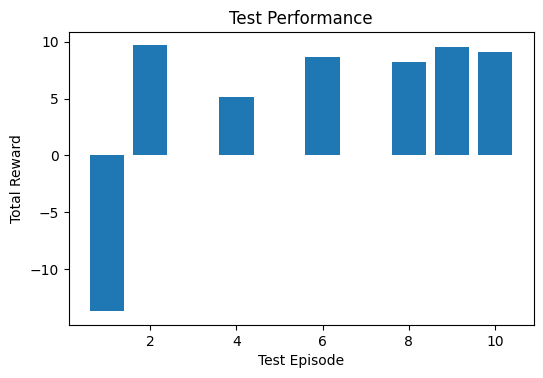

In [27]:
test_agent()

Test Episode 1, Total Reward: 9.736101259617424 Won
Test Episode 2, Total Reward: 9.667336289306263 Won
Test Episode 3, Total Reward: 9.167721708426102 Won
Test Episode 4, Total Reward: -12.339990078601614 Lost
Test Episode 5, Total Reward: 9.85347739534332 Won
Test Episode 6, Total Reward: 9.341216348762549 Won
Test Episode 7, Total Reward: 8.181506369447455 Won
Test Episode 8, Total Reward: 9.12642706571942 Won
Test Episode 9, Total Reward: 9.579587182378893 Won
Test Episode 10, Total Reward: 9.0142776433746 Won
Winrate: 0.9, Tie Rate: 0.0, Loss Rate: 0.1
Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_bigger_nn/stats/plots/test_results_weak_vs_prio_agent.png


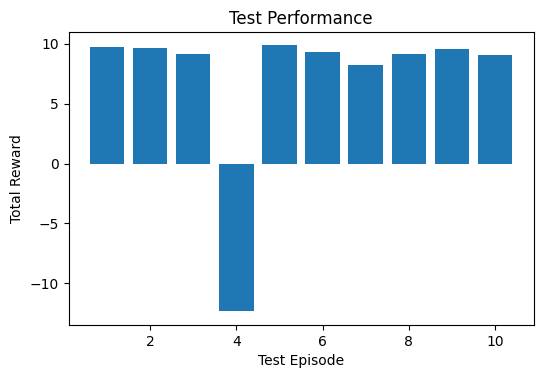

In [28]:
test_agent(opponent = h_env.BasicOpponent(weak=True), opponent_name = "weak", agent_name = "prio_agent")



Test Episode 1, Total Reward: 9.430329732182486 Won
Test Episode 2, Total Reward: 9.660919744829213 Won
Test Episode 3, Total Reward: 9.638569178369451 Won
Test Episode 4, Total Reward: 8.659713965557042 Won
Test Episode 5, Total Reward: -2.1863679001750307 Tie
Test Episode 6, Total Reward: 9.373198030488902 Won
Test Episode 7, Total Reward: 8.684316240441813 Won
Test Episode 8, Total Reward: 7.500286002406707 Won
Test Episode 9, Total Reward: 9.887614535267197 Won
Test Episode 10, Total Reward: 9.001691415416875 Won
Winrate: 0.9, Tie Rate: 0.1, Loss Rate: 0.0
Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_bigger_nn/stats/plots/test_results_non_weak_vs_prio_agent.png


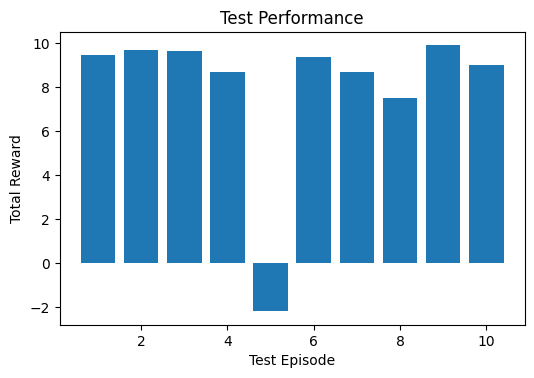

In [29]:
test_agent(opponent = h_env.BasicOpponent(weak=False), opponent_name = "non_weak", agent_name = "prio_agent")

Test Episode 1, Total Reward: 9.507137196530868
Test Episode 2, Total Reward: -11.86406422944192
Test Episode 3, Total Reward: 7.518279632897677
Test Episode 4, Total Reward: 7.647808038448842
Test Episode 5, Total Reward: 9.483397470962204
Test Episode 6, Total Reward: 8.393382594722901
Test Episode 7, Total Reward: 8.87343721050558
Test Episode 8, Total Reward: -11.835428896255877
Test Episode 9, Total Reward: -11.234519952997257
Test Episode 10, Total Reward: 8.587938103814343
Plot saved at ../weights/Noisy_Dueling_Double_DQN_Prio_n_step_4_bigger_nn/stats/plots/test_results_selfplay.png


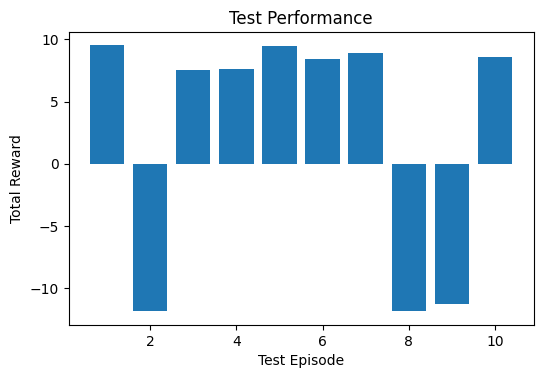

In [30]:
test_episodes = len(SEEDS_TEST)
test_rewards = []

opponent = copy.deepcopy(agent)
#opponent.Q.load(env_name, name = "episode_1500")

max_steps = 30000

for episode in range(test_episodes):

    state, _ = env.reset(seed = SEEDS_TEST[episode])
    env.action_space.seed(seed)
    state = state[0] if isinstance(state, tuple) else state  # Handle Gymnasium compatibility

    obs_agent2 = env.obs_agent_two()
    obs_agent2 = obs_agent2[0] if isinstance(obs_agent2, tuple) else obs_agent2

    total_reward = 0

    frames = []
    
    for t in range(max_steps):

        done = False

        frame = env.render(mode = "rgb_array")
        if frame is not None:
            frames.append(frame)

        a1 = agent.act(state, eps = 0.0)
        a2 = opponent.act(obs_agent2)

        if(USE_MORE_ACTIONS):
            a1_cont = MORE_ACTIONS[a1]
            a2 = MORE_ACTIONS[a2]
        else: 
            a1_cont = env.discrete_to_continous_action(a1)
            a2 = env.discrete_to_continous_action(a2)

        full_action = np.hstack([a1_cont, a2])

        next_state, reward, done, truncated, _ = env.step(full_action)
        
        total_reward += reward

        state = next_state
        obs_agent2 = env.obs_agent_two()

        if done or truncated: break
        

    test_rewards.append(total_reward)
    print(f"Test Episode {episode+1}, Total Reward: {total_reward}")
    
    if frames:
        os.makedirs(f"{env_name}/test_gifs/selfplay", exist_ok=True)
        imageio.mimsave(f"{env_name}/test_gifs/selfplay/test_episode_{episode+1}.gif", frames, fps=30)

env.close()

sf.save_test_results(env_name, test_rewards, name = "test_results_selfplay")